# Latent Dirichlet Allocation

We use the Latent Dirichlet Allocation model to discover topics of talks from the Church of Jesus Christ of Latter-day Saints General Conference dataset. We use 10 topics as categories, most of which end up nonsensical. However, the process does capture two interesting topics that comes up cyclically -- topic 0 captures the annual auditing report, and topic 2 represents the semi-annual sustaining of church leaders by the members.

In [0]:
import numpy as np
import re
 
vocab = set()
docs = []
 
D = 472 # number of documents
ITERS = 100
K = 10 # number of topics
 
# open each file; convert everything to lowercase and strip non-letter symbols; split into words
for fileind in range( 1, D+1 ):
    foo = open( 'LDA/LDAfiles/output%04d.txt' % fileind , encoding="utf8").read()    
 
    tmp = re.sub( '[^a-z ]+', ' ', foo.lower() ).split()
    docs.append( tmp )
 
    for w in tmp:
        vocab.add( w )

# vocab now has unique words
# give each word in the vocab a unique id
ind = 0
vhash = {}
vindhash = {}
for i in list(vocab):
    vhash[i] = ind
    vindhash[ind] = i
    ind += 1

# size of our vocabulary
V = ind

#only selects the first 1500 words of each document
SMALLER_DOC = 1500

# reprocess each document and re-represent it as a list of word ids
 
docs_i = []
for d in docs:
    dinds = []
    new_d = d[0:SMALLER_DOC]
    for w in new_d:
        dinds.append( vhash[w] )
    docs_i.append( dinds )

# ======================================================================

In [0]:
def randomly_assign_topics( docs_i, K ):
    qs = [None]*len(docs_i)
    for i in range(len(qs)): #For each ith document
        qs[i] = (np.random.randint(K, size=len(docs_i[i])))
    return qs

alphas = np.ones((K,1))[:,0]
gammas = np.ones((V,1))[:,0]
 
# topic distributions
bs = np.zeros((V,K))
# how should this be initialized?
for i in range(K):
    bs[:,i] = 1/V
    
# per-document-topic distributions
pis = np.zeros((K,D))  
# how should this be initialized?
for i in range(D):
    pis[:,i] = 1/K

#log likelihoods
p = np.zeros((ITERS))

def resample_bs(c_ivk):
    c_vk = np.sum(c_ivk, axis=0)
    bs = np.empty((V,K))
    for k in range (K):
        #print(k*10, "%")
        bs[:,k] = np.random.dirichlet(gammas + c_vk[:,k])
    return bs

def resample_pis(c_ivk):
    c_ik = np.sum(c_ivk, axis=1)
    pis = np.empty((K,D))
    for i in range (D):
        #print(i*100/D, "%")
        pis[:,i] = np.random.dirichlet(alphas + c_ik[i,:])
    return pis

def resample_qs():
    qs = []
    c_ivk = np.zeros((D, V, K))
    for i in range(D):
        temp_qs = []
        #print(i, "Doc")
        for l in range(len(docs_i[i])):
            word_id = docs_i[i][l]
            probs = pis[:,i]*bs[word_id,:]/np.sum(pis[:,i]*bs[word_id,:])
            qil = np.random.choice(K, 1, replace=True, p=probs)
            temp_qs.append(qil)
            c_ivk[i, word_id, qil] += 1
        qs.append(temp_qs)
    return qs, c_ivk
    
#log likelihood
def compute_data_likelihood():
    logs = 0
    for i in range (len(docs_i)):
        for l in range(len(docs_i[i])):
            word_id = docs_i[i][l]
            logs += np.log(bs[word_id, qs[i][l]])
    '''for i in range(D):
        p_pi_alpha += np.sum(scipy.dirichlet.logpdf(pis[:,i], alphas))
    for k in range(K):
        pi
    '''    
    return logs
    
for iters in range(ITERS):
    qs, c_ivk = resample_qs()
    print("Iter", iters)
    bs = resample_bs(c_ivk)
    pis = resample_pis(c_ivk)

    p[iters] = compute_data_likelihood()
    #print("Iter %d, p=%.2f" % (iters,p))
    
    # resample per-word topic assignments bs
 
    # resample per-document topic mixtures pis
 
    # resample topics
    #update cvk

Iter 0
Iter 1
Iter 2
Iter 3
Iter 4
Iter 5
Iter 6
Iter 7
Iter 8
Iter 9
Iter 10
Iter 11
Iter 12
Iter 13
Iter 14
Iter 15
Iter 16
Iter 17
Iter 18
Iter 19
Iter 20
Iter 21
Iter 22
Iter 23
Iter 24
Iter 25
Iter 26
Iter 27
Iter 28
Iter 29
Iter 30
Iter 31
Iter 32
Iter 33
Iter 34
Iter 35
Iter 36
Iter 37
Iter 38
Iter 39
Iter 40
Iter 41
Iter 42
Iter 43
Iter 44
Iter 45
Iter 46
Iter 47
Iter 48
Iter 49
Iter 50
Iter 51
Iter 52
Iter 53
Iter 54
Iter 55
Iter 56
Iter 57
Iter 58
Iter 59
Iter 60
Iter 61
Iter 62
Iter 63
Iter 64
Iter 65
Iter 66
Iter 67
Iter 68
Iter 69
Iter 70
Iter 71
Iter 72
Iter 73
Iter 74
Iter 75
Iter 76
Iter 77
Iter 78
Iter 79
Iter 80
Iter 81
Iter 82
Iter 83
Iter 84
Iter 85
Iter 86
Iter 87
Iter 88
Iter 89
Iter 90
Iter 91
Iter 92
Iter 93
Iter 94
Iter 95
Iter 96
Iter 97
Iter 98
Iter 99


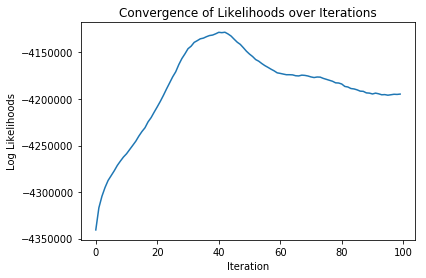

In [0]:
import matplotlib.pyplot as plt

x_mesh = [x for x in range(ITERS)]
fig, ax = plt.subplots()
ax.plot(x_mesh, p)
ax.set_ylabel("Log Likelihoods")
ax.set_xlabel("Iteration")
ax.set_title("Convergence of Likelihoods over Iterations")
plt.show()

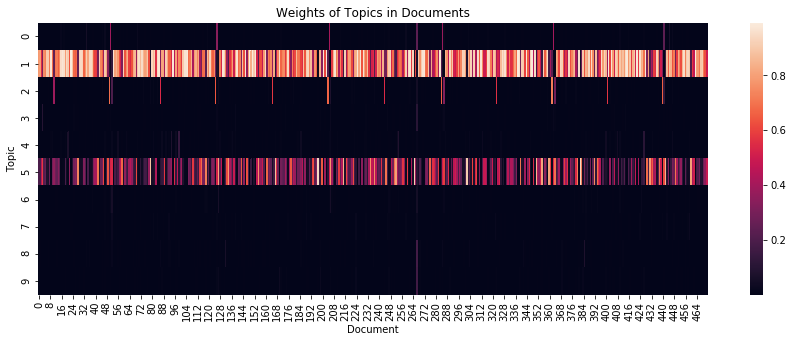

In [0]:
#heatmap
import seaborn
plt.subplots(figsize=(15,5))
ax = seaborn.heatmap(pis)
ax.set_ylabel("Topic")
ax.set_xlabel("Document")
ax.set_title("Weights of Topics in Documents")
plt.show()

In [0]:
#print topics
vocab = list(vocab)

def print_topics(bs):
    b = bs.copy()
    for k in range(K):
        print("Topic", k)
        indices = []
        for words in range(5):
            maximum = np.argmax(b[:,k])
            indices.append(maximum)
            b[maximum, k] = 0
        for i in indices:
            print(vocab[i])
print_topics(bs)

Topic 0
auditing
funds
director
department
departments
Topic 1
the
of
and
to
in
Topic 2
it
manifest
please
proposed
l
Topic 3
rose
eva
drawn
aunt
godliness
Topic 4
daniel
beware
bismarck
babylon
trout
Topic 5
the
and
to
of
in
Topic 6
wearing
enjoyable
vegetation
assemblies
violating
Topic 7
lazy
passion
ncaa
lit
faultless
Topic 8
hazardous
tithing
stories
expected
doors
Topic 9
fate
hiked
kneeling
recover
synoptic


In [0]:
# collapsed Gibbs

def randomly_assign_topics( docs_i, K ):
    qs = [None]*len(docs_i)
    for i in range(len(qs)): #For each ith document
        qs[i] = (np.random.randint(K, size=len(docs_i[i])))
    return qs

def initialize_c_ivk():
    c_ivk = np.zeros((D, V, K))
    for i in range(len(docs_i)):
        for l in range(len(docs_i[i])):
            #word_id = docs_i[i][l]
            #word_topic = qs[i][l]
            c_ivk[i, docs_i[i][l], qs[i][l]] += 1 # number of topic k assignments for that word id in that doc +=1
    return c_ivk

def collapsed_gibbs(c_ivk, qs):
    c_vk = np.sum(c_ivk, axis=0)
    c_ik = np.sum(c_ivk, axis=1)
    c_k = np.sum(c_ik, axis=0)
    logs = 0
    for i in range(D):
        #probs = []
        for l in range(len(docs_i[i])):
            #print("word", l)
            word_id = docs_i[i][l]
            c_ivk[i][word_id][qs[i][l]] -= 1
            c_vk[word_id][qs[i][l]] -= 1
            c_ik[i][qs[i][l]] -= 1
            c_k[qs[i][l]] -= 1
            lh_term = (c_vk[word_id] + 1)/(c_k + V*1)
            rh_term = (c_ik[i] + 1)/(len(docs_i[i]) + K*1)
            probs = lh_term * rh_term
            probs = probs/np.sum(probs)
            qs[i][l] = np.random.choice(K, 1, replace=True, p=probs)
            logs += np.log(probs[qs[i][l]])
            c_ivk[i][word_id][qs[i][l]] += 1
            c_vk[word_id][qs[i][l]] += 1
            c_ik[i][qs[i][l]] += 1
            c_k[qs[i][l]] += 1
    return c_ivk, qs, logs

qs = randomly_assign_topics( docs_i, K )
c_ivk = initialize_c_ivk()
ps = np.zeros(ITERS)

def collapsed_likelihood():
    logs = 0
    for i in range (len(docs_i)):
        for l in range(len(docs_i[i])):
            word_id = docs_i[i][l]
            logs += np.log(bs[word_id, qs[i][l]])

log_liks = []
ITERS = 100
for iters in range(ITERS):
    print("Iter", iters)
    c_ivk, qs, logs = collapsed_gibbs(c_ivk, qs)
    print("p=", logs)
    log_liks.append(logs)
    
ax.plot(x_mesh, log_liks, label='Collapsed Gibbs')
ax.set_ylabel("Log Likelihoods")
ax.set_xlabel("Iteration")
ax.set_title("Convergence of Likelihoods over Iterations")
plt.show()

Iter 0
p= -1481516.82215
Iter 1
p= -1455167.18168
Iter 2
p= -1434161.41865
Iter 3
p= -1416676.80157
Iter 4
p= -1400102.73896
Iter 5
p= -1380963.70585
Iter 6
p= -1359382.54641
Iter 7
p= -1330998.71843
Iter 8
p= -1299522.30578
Iter 9
p= -1260584.55625
Iter 10
p= -1214077.65882
Iter 11
p= -1154308.73337
Iter 12
p= -1084974.55316
Iter 13
p= -1001249.10284
Iter 14
p= -908189.175587
Iter 15
p= -811222.14836
Iter 16
p= -724079.676477
Iter 17
p= -647720.008879
Iter 18
p= -587445.230892
Iter 19
p= -543610.157765
Iter 20
p= -508506.020016
Iter 21
p= -481614.600162
Iter 22
p= -459651.905512
Iter 23
p= -440991.404923
Iter 24
p= -423369.864621
Iter 25
p= -406752.140813
Iter 26
p= -392776.09782
Iter 27
p= -377193.85821
Iter 28
p= -360644.430092
Iter 29
p= -343179.156025
Iter 30
p= -324950.724469
Iter 31
p= -306809.528756
Iter 32
p= -290001.176114
Iter 33
p= -271657.803047
Iter 34
p= -249659.847557
Iter 35
p= -230058.926126
Iter 36
p= -210741.250958
Iter 37
p= -192989.488703
Iter 38
p= -177071.866112

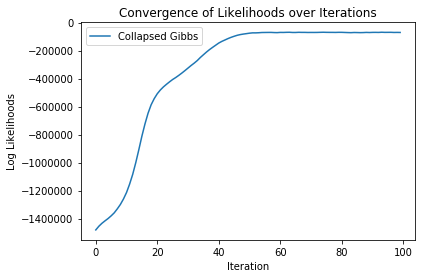

In [0]:
fig, ax1 = plt.subplots()
ax1.plot(x_mesh[0:ITERS], log_liks, label='Collapsed Gibbs')
ax1.set_ylabel("Log Likelihoods")
ax1.set_xlabel("Iteration")
ax1.set_title("Convergence of Likelihoods over Iterations")
ax1.legend()
plt.show()